In [1]:
##################################################################################
############################### LOADING DATA #####################################
##################################################################################

In [2]:
import pandas as pd
import numpy as np
import data_handler as dh

import matplotlib.pyplot as plt
from matplotlib import offsetbox
%matplotlib inline

In [3]:
train,test = dh.load_titanic("~/data/kaggle/titanic/")
x_train, y_train, x_test,  y_test = dh.clean_titanic(train,test)

In [4]:
print x_train.shape, y_train.shape, x_test.shape, y_test.shape

(891, 11) (891, 1) (891, 11) (891, 1)


In [5]:
x_train.head()

,Age,Fare,Parch,SibSp,C,Q,S,female,1,2,3
0,22.0,7.2500,0,1,0,0,1,0,0,0,1
1,38.0,71.2833,0,1,1,0,0,1,1,0,0
2,26.0,7.9250,0,0,0,0,1,1,0,0,1
3,35.0,53.1000,0,1,0,0,1,1,1,0,0
4,35.0,8.0500,0,0,0,0,1,0,0,0,1


In [6]:
y_train.head()

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [7]:
def plot_embedding(x, y):
    x_min, x_max = np.min(x, 0), np.max(x, 0)
    x = (x - x_min) / (x_max - x_min)

    plt.figure()
    plt.rcParams['figure.figsize'] = (6, 6)
    ax = plt.subplot(111)
    #for i in range(x.shape[0]):
    #    plt.scatter(x[i, 0], x[i, 1], color=y[i])
    
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40)

    #if hasattr(offsetbox, 'AnnotationBbox'):
    #    # only print thumbnails with matplotlib > 1.0
    #    shown_images = np.array([[1., 1.]])  # just something big
    #    for i in range(y.shape[0]):
    #        dist = np.sum((x[i] - shown_images) ** 2, 1)
    #        if np.min(dist) < 4e-3:
    #            # don't show points that are too close
    #            continue
    #        shown_images = np.r_[shown_images, [X[i]]]
    plt.xticks([]), plt.yticks([])

In [8]:
##################################################################################
###################### Stand prescaling (mean:0 stddev*1) ########################
##################################################################################

In [9]:
from sklearn import preprocessing

In [10]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
x_scaled = scaler.transform(x_train) 
x_scaled_test = scaler.transform(x_test) 

In [15]:
print x_scaled[0:10,:]

[[-0.59525389 -0.50244517 -0.47367361  0.43279337 -0.48204268 -0.30756234
   0.61930636 -0.73769513 -0.56568542 -0.51015154  0.90258736]
 [ 0.6359965   0.78684529 -0.47367361  0.43279337  2.0745051  -0.30756234
  -1.61470971  1.35557354  1.76776695 -0.51015154 -1.10792599]
 [-0.28744129 -0.48885426 -0.47367361 -0.4745452  -0.48204268 -0.30756234
   0.61930636  1.35557354 -0.56568542 -0.51015154  0.90258736]
 [ 0.40513705  0.42073024 -0.47367361  0.43279337 -0.48204268 -0.30756234
   0.61930636  1.35557354  1.76776695 -0.51015154 -1.10792599]
 [ 0.40513705 -0.48633742 -0.47367361 -0.4745452  -0.48204268 -0.30756234
   0.61930636 -0.73769513 -0.56568542 -0.51015154  0.90258736]
 [ 0.01122448 -0.47811643 -0.47367361 -0.4745452  -0.48204268  3.25137334
  -1.61470971 -0.73769513 -0.56568542 -0.51015154  0.90258736]
 [ 1.86724688  0.39581356 -0.47367361 -0.4745452  -0.48204268 -0.30756234
   0.61930636 -0.73769513  1.76776695 -0.51015154 -1.10792599]
 [-2.13431687 -0.22408312  0.76762988  2.

In [35]:
x_scaled.mean(axis=0)

array([ -1.75442651e-16,   3.98733297e-18,   5.38289951e-17,
         4.38606627e-17,  -1.99366649e-17,   0.00000000e+00,
        -4.98416622e-17,   3.98733297e-17,  -7.57593265e-17,
         1.99366649e-17,  -6.77846605e-17])

In [34]:
x_test.mean()

Age       29.735277
Fare      32.204208
Parch      0.381594
SibSp      0.523008
C          0.188552
Q          0.086420
S          0.722783
female     0.352413
1          0.242424
2          0.206510
3          0.551066
dtype: float64

In [16]:
##################################################################################
###################### PCA (Principle Component Analysis) ########################
##################################################################################

In [17]:
from sklearn import decomposition

In [18]:
pca = decomposition.PCA(n_components=2)
x_train_pca = pca.fit_transform(x_scaled)
x_test_pca  = pca.transform(x_scaled_test)

In [19]:
print x_train_pca[0:10,:], "\n", x_test_pca[0:3,:],

[[-1.52478306  0.1041834 ]
 [ 3.42734368  1.0261373 ]
 [-1.09296578  0.1218428 ]
 [ 1.53924197 -1.04805805]
 [-1.26395846 -0.01998167]
 [-1.00843481  2.80907169]
 [ 1.55824463 -1.28258981]
 [-1.76208482  0.2126636 ]
 [-0.96549183 -0.02033676]
 [ 1.34005432  0.44061068]] 
[[-1.52478306  0.1041834 ]
 [ 3.42734368  1.0261373 ]
 [-1.09296578  0.1218428 ]]


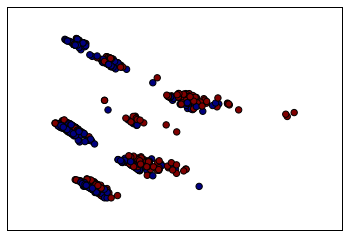

In [20]:
plot_embedding(x_train_pca, y_train.values)

In [ ]:
##################################################################################
###################### ICA (Independent Component Analysis) ######################
##################################################################################

In [21]:
ica = decomposition.FastICA(n_components=2)
x_train_ica = ica.fit_transform(x_scaled)
x_test_ica  = ica.transform(x_scaled_test)

In [22]:
print x_train_ica[0:10,:], "\n", x_test_ica[0:3,:],

[[-0.02683315 -0.01758327]
 [ 0.04187508  0.06338672]
 [-0.01992407 -0.01171067]
 [ 0.04088272 -0.00010331]
 [-0.02068727 -0.01658913]
 [-0.05783711  0.04025548]
 [ 0.0446295  -0.0043004 ]
 [-0.03235911 -0.01857272]
 [-0.01572802 -0.0127679 ]
 [ 0.01579622  0.02552959]] 
[[-0.02683315 -0.01758327]
 [ 0.04187508  0.06338672]
 [-0.01992407 -0.01171067]]


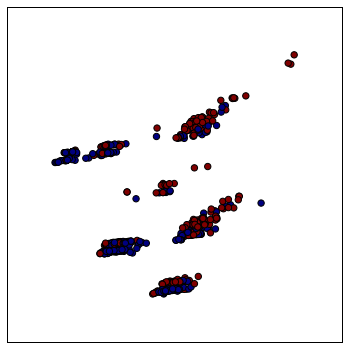

In [23]:
plot_embedding(x_train_ica, y_train.values)

In [24]:
##################################################################################
############### tSNE (t-distributed Stochastic Neighbor Embedding.) ##############
##################################################################################

In [25]:
from sklearn  import manifold

In [26]:
tsne = manifold.TSNE(n_components=2, random_state=0)
# np.set_printoptions(suppress=True)
x_train_tsne = tsne.fit_transform(x_scaled, y=y_train)
#x_test_tsne  = tsne.transform(x_scaled_test)

In [27]:
print x_train_tsne[0:10,:]

[[  9.729231   -12.54894064]
 [ 12.98835514  -3.24838935]
 [  3.90390269   7.78883971]
 [ -9.09711583   6.35885297]
 [  9.99958454   5.04513542]
 [ -5.02607596  23.16174587]
 [-13.93573133  -6.38286387]
 [ -4.81986836   9.97292906]
 [ -0.23197608   7.31218444]
 [ 19.31801488  -4.30967885]]


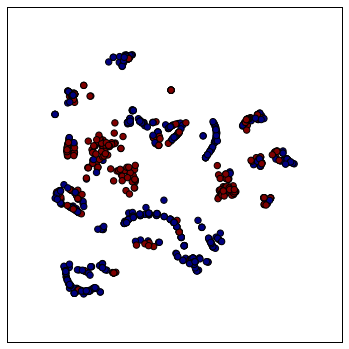

In [28]:
plot_embedding(x_train_tsne, y_train.values)

In [29]:
##################################################################################
########################### ISOMap (Isometric Mapping) ###########################
##################################################################################

In [30]:
iso = manifold.Isomap(n_components=2)
x_train_iso = iso.fit_transform(x_scaled, y=y_train)
x_test_iso  = iso.transform(x_scaled_test)

In [31]:
print x_train_iso[0:10,:]

[[ -7.24544966   4.25383565]
 [  2.28842994   0.27508755]
 [ -6.93103634  -6.04268785]
 [  2.18016429   0.18068272]
 [ -8.24162739   0.66161769]
 [ 25.6426373    1.52824066]
 [  2.24326094   0.25386129]
 [ -9.26720956   9.0270269 ]
 [ -1.04040247  -8.24479917]
 [  2.34601958   0.32472558]]


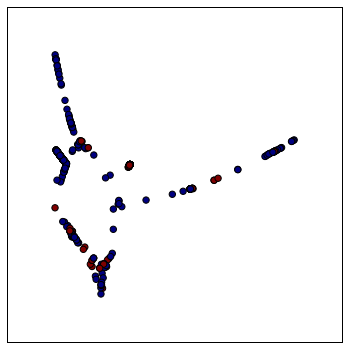

In [32]:
plot_embedding(x_train_iso, y_train.values)